<a href="https://colab.research.google.com/github/Tobsam237/Project_capstone3/blob/main/03_ExploratoryDataAnalysis_Capstone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis**
At this stage, we will explore each feature independently and how they relate them to the target variable so has to gain greater insights to data and problem. This process will be achieved using visualization that best fits goal. 

In [15]:
#Import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
data = files.upload()

Saving df_wrangled3.csv to df_wrangled3 (1).csv


In [17]:
df = pd.read_csv('df_wrangled3.csv', index_col=0)
df.head()

FileName       Date      SegFile      b  ...   FS  SUSP  CLASS  NSP
0  Variab10.txt  12/1/1996  CTG0001.txt  240.0  ...  1.0   0.0    9.0  2.0
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0  ...  0.0   0.0    6.0  1.0
2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177.0  ...  0.0   0.0    6.0  1.0
3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411.0  ...  0.0   0.0    6.0  1.0
4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533.0  ...  0.0   0.0    2.0  1.0

[5 rows x 38 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   AC        2126 non-null   float64
 7   FM        2126 non-null   float64
 8   UC        2126 non-null   float64
 9   ASTV      2126 non-null   float64
 10  MSTV      2126 non-null   float64
 11  ALTV      2126 non-null   float64
 12  MLTV      2126 non-null   float64
 13  DL        2126 non-null   float64
 14  DS        2126 non-null   float64
 15  DP        2126 non-null   float64
 16  Width     2126 non-null   float64
 17  Min       2126 non-null   float64
 18  Max       2126 non-null   float64
 19  Nmax      2126 non-null   float64
 20  Nzeros    2126 non-null   floa

In [19]:
print(df.isna().sum().sum())
df.duplicated().sum()

0


0

In [20]:
df.nunique().to_frame().T

FileName  Date  SegFile    b     e  LBE  ...  DE  LD  FS  SUSP  CLASS  NSP
0       352    48     2126  979  1064   48  ...   2   2   2     2     10    3

[1 rows x 38 columns]

Our data seems all set and ready for exploration as we have cleaned data in the wrangling stage. Let's go ahead and begin with exploration.

Let's begin our exploratory analysis by having an overall understanding of our data in relation with each other, with a hue on our target variable.

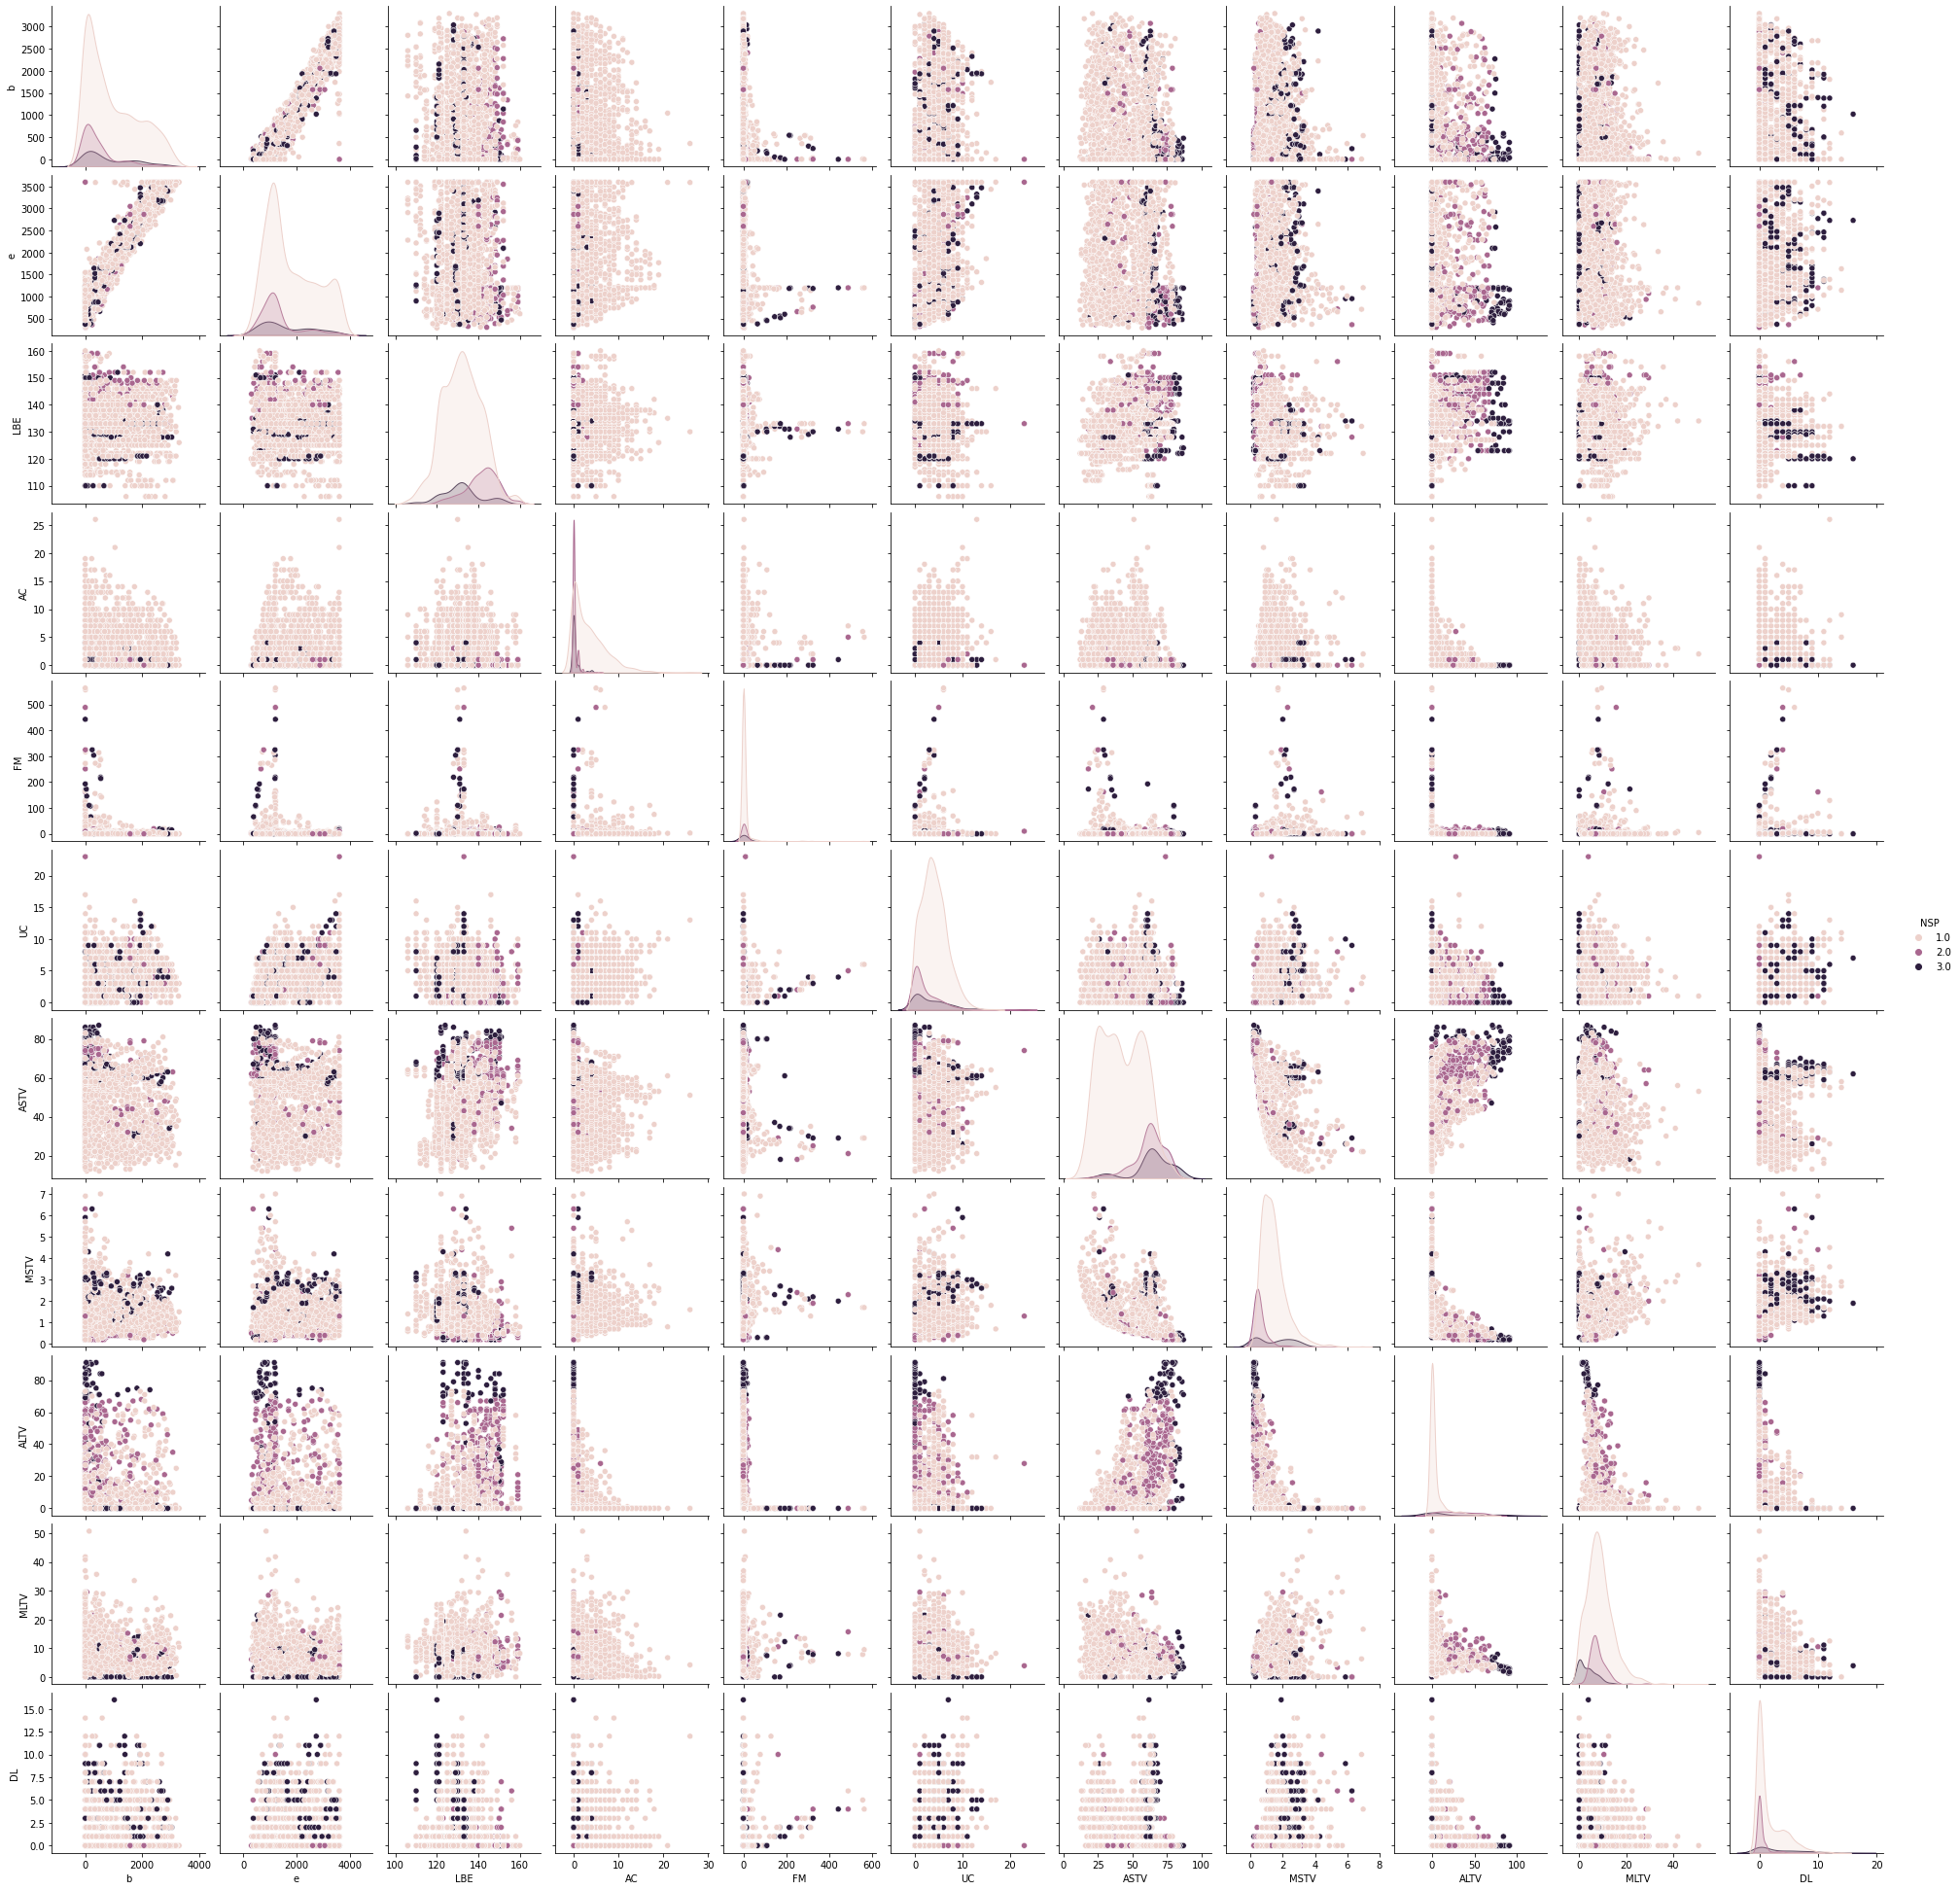

In [21]:
#Let's use seaborn's pairplot to see pairwise multivariate distribution of our data.
#We have splitted the data to reduce machine runtime
sns.pairplot(df, vars=['b', 'e', 'LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL'], hue='NSP')

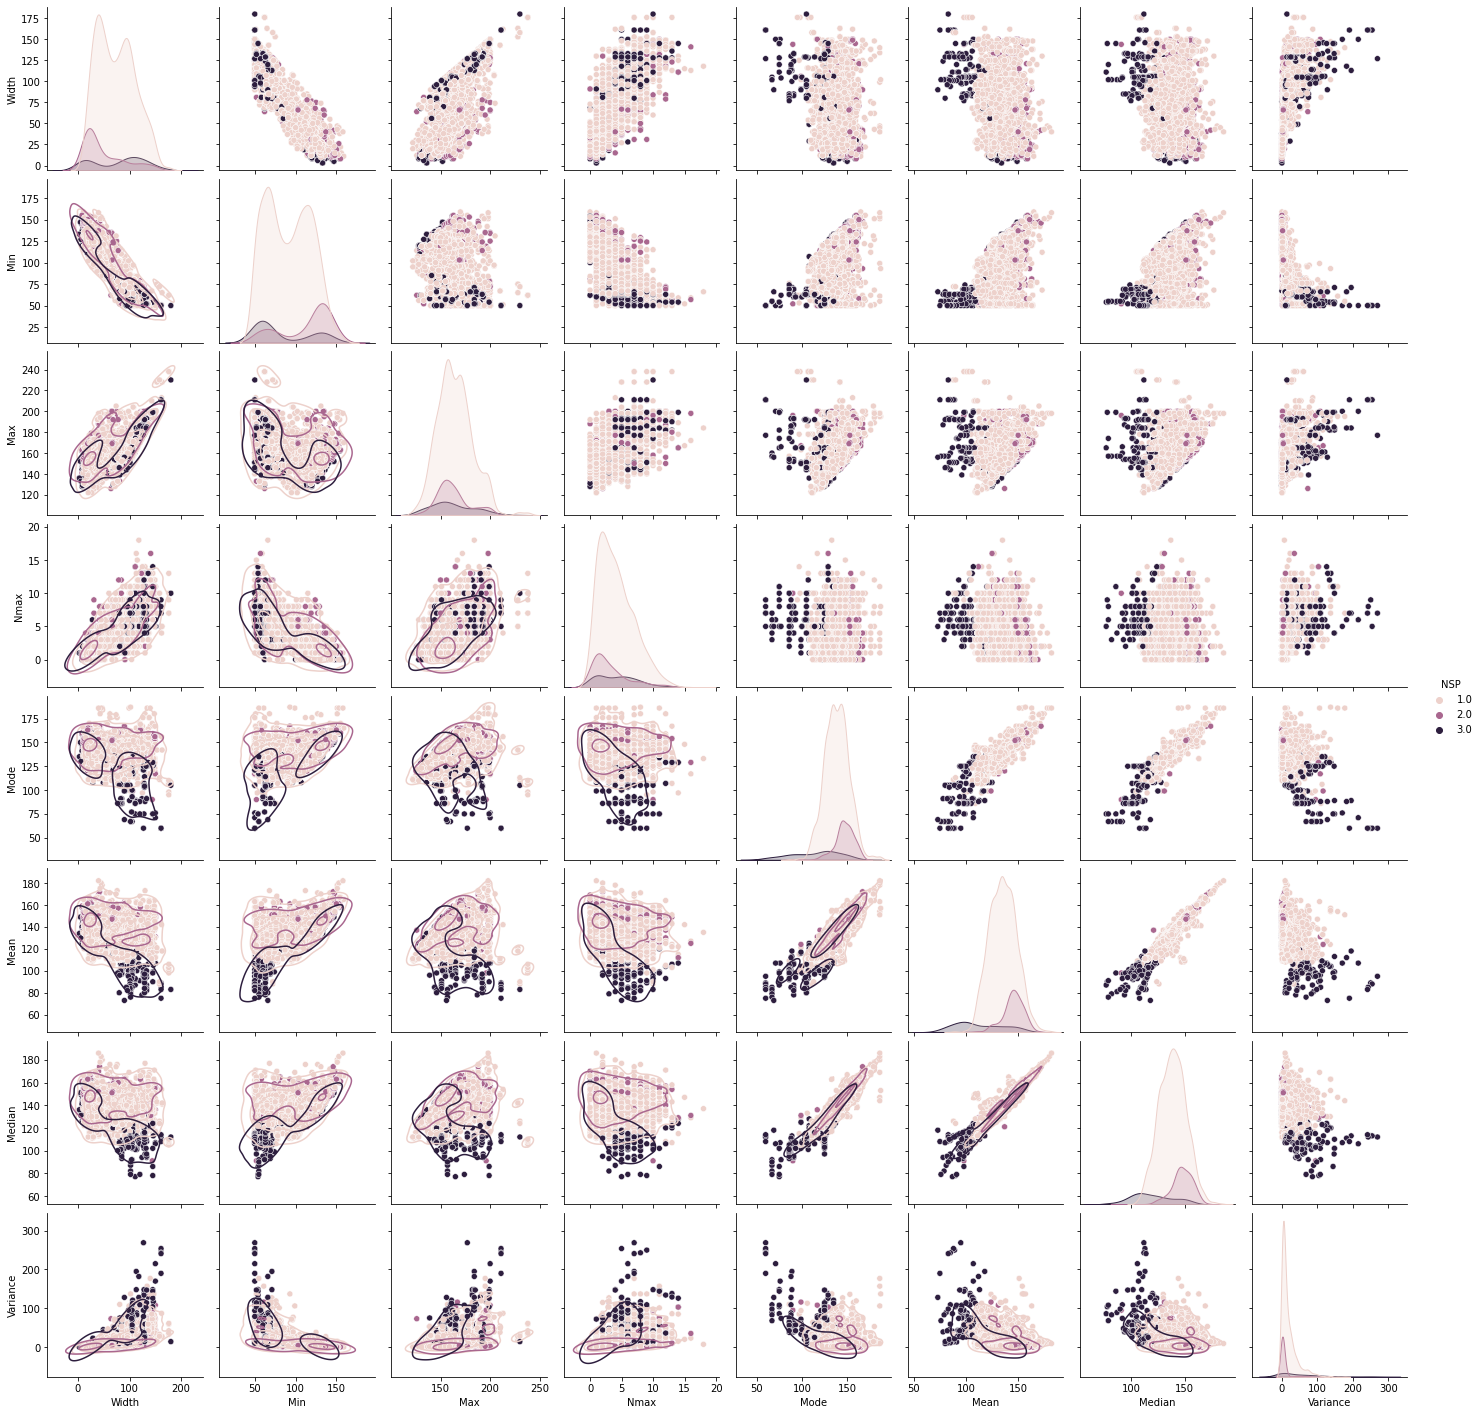

In [22]:
g = sns.pairplot(df, vars=['Width', 'Min', 'Max', 'Nmax', 'Mode', 'Mean', 'Median', 'Variance',], hue='NSP')
g.map_lower(sns.kdeplot, levels=4, color='.2')


* Observe pairwise multivariate distributions of each features above
* While NSP is random in some relationships, it's quite ordered in clusters in some


##Univairate Analysis: Categorical data
We begin our exploration with the analysis of each of our data using intersting plots to get a explicit and strong understanding of data.

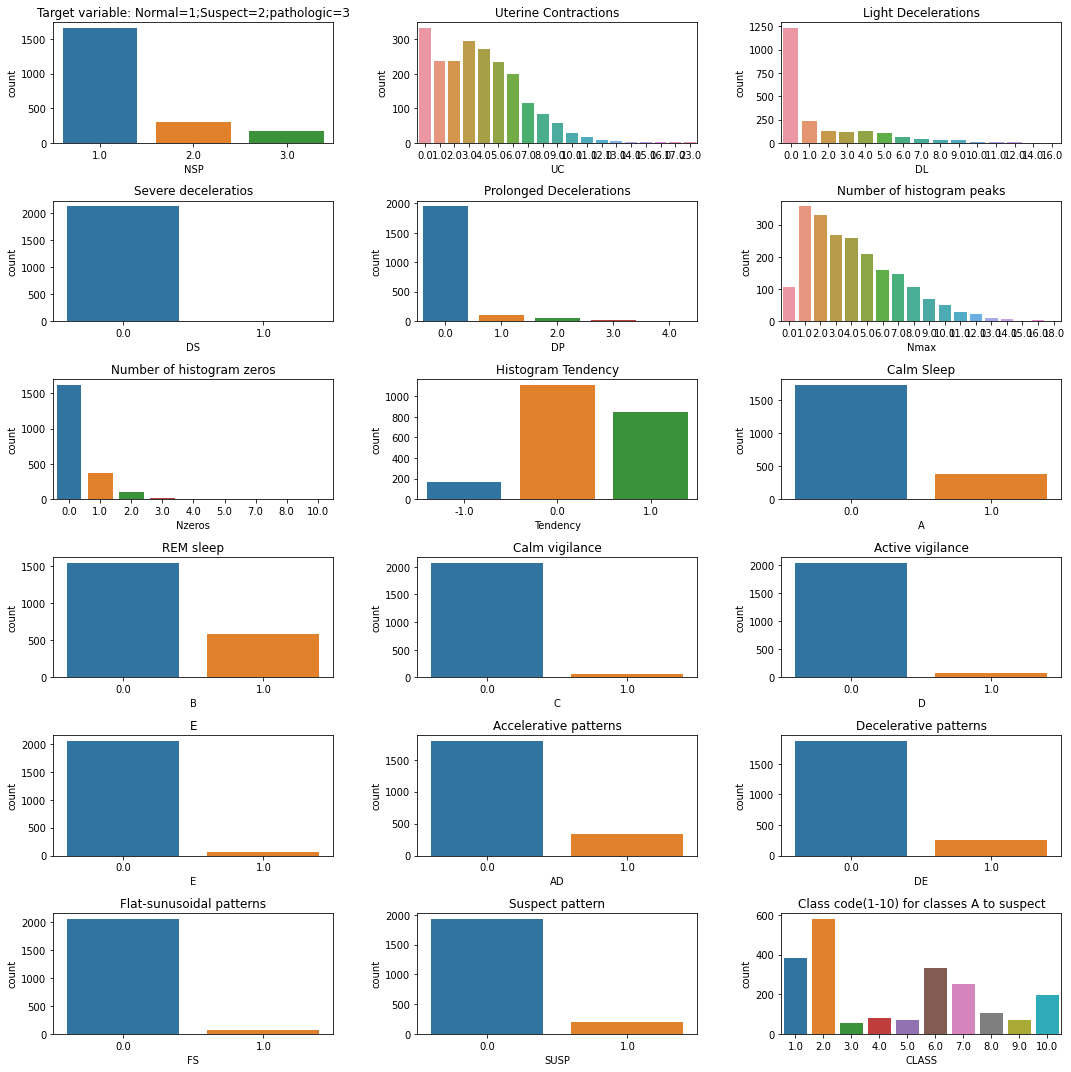

In [23]:
fig, axes = plt.subplots(6,3, figsize =(15,15))

axes[0,0].set_title('Target variable: Normal=1;Suspect=2;pathologic=3')
sns.countplot(x='NSP', data=df, ax=axes[0,0])

axes[0,1].set_title('Uterine Contractions')
sns.countplot(x='UC', data=df, ax=axes[0,1])

axes[0,2].set_title('Light Decelerations')
sns.countplot(x='DL', data=df, ax=axes[0,2])

axes[1,0].set_title('Severe deceleratios')
sns.countplot(x='DS', data=df, ax=axes[1,0])

axes[1,1].set_title('Prolonged Decelerations')
sns.countplot(x='DP', data=df, ax=axes[1,1])

axes[1,2].set_title('Number of histogram peaks')
sns.countplot(x='Nmax', data=df, ax=axes[1,2])

axes[2,0].set_title('Number of histogram zeros')
sns.countplot(x='Nzeros', data=df, ax=axes[2,0])

axes[2,1].set_title('Histogram Tendency')
sns.countplot(x='Tendency', data=df, ax=axes[2,1])

axes[2,2].set_title('Calm Sleep')
sns.countplot(x='A', data=df, ax=axes[2,2])

axes[3,0].set_title('REM sleep')
sns.countplot(x='B', data=df, ax=axes[3,0])

axes[3,1].set_title('Calm vigilance')
sns.countplot(x='C', data=df, ax=axes[3,1])

axes[3,2].set_title('Active vigilance')
sns.countplot(x='D', data=df, ax=axes[3,2])

axes[4,0].set_title('E')
sns.countplot(x='E', data=df, ax=axes[4,0])

axes[4,1].set_title('Accelerative patterns')
sns.countplot(x='AD', data=df, ax=axes[4,1])

axes[4,2].set_title('Decelerative patterns')
sns.countplot(x='DE', data=df, ax=axes[4,2])

axes[5,0].set_title('Flat-sunusoidal patterns')
sns.countplot(x='FS', data=df, ax=axes[5,0])

axes[5,1].set_title('Suspect pattern')
sns.countplot(x='SUSP', data=df, ax=axes[5,1])

axes[5,2].set_title('Class code(1-10) for classes A to suspect')
sns.countplot(x='CLASS', data=df, ax=axes[5,2])
plt.tight_layout()

**Observations from the above univariate analysis of the categorical variables**

* Our Target variable NSP has majority of Normal fetus and less of Suspect and patholgic cases
*Majority of the cases has Uterine contractions ranging from 1- 6
* Most cases had Light decelerations of zero
* Almost no cases had seveeve or prolonged decelerations of the fetal heartbeat
* about 1500 of our fetus has 0 value for Calm and Rem sleep
* Fetal heartbeat rate for about 2000 of our fetal data has 0 value for Accelerative/Decelerative and Flat-sinuosoidal patterns
* Most of our fetal had zero for value of Calm and Active vigilance 

##Univairate Analysis: Numerical Data
Next we observe our numberial data individually, also checking for outliers using boxplots


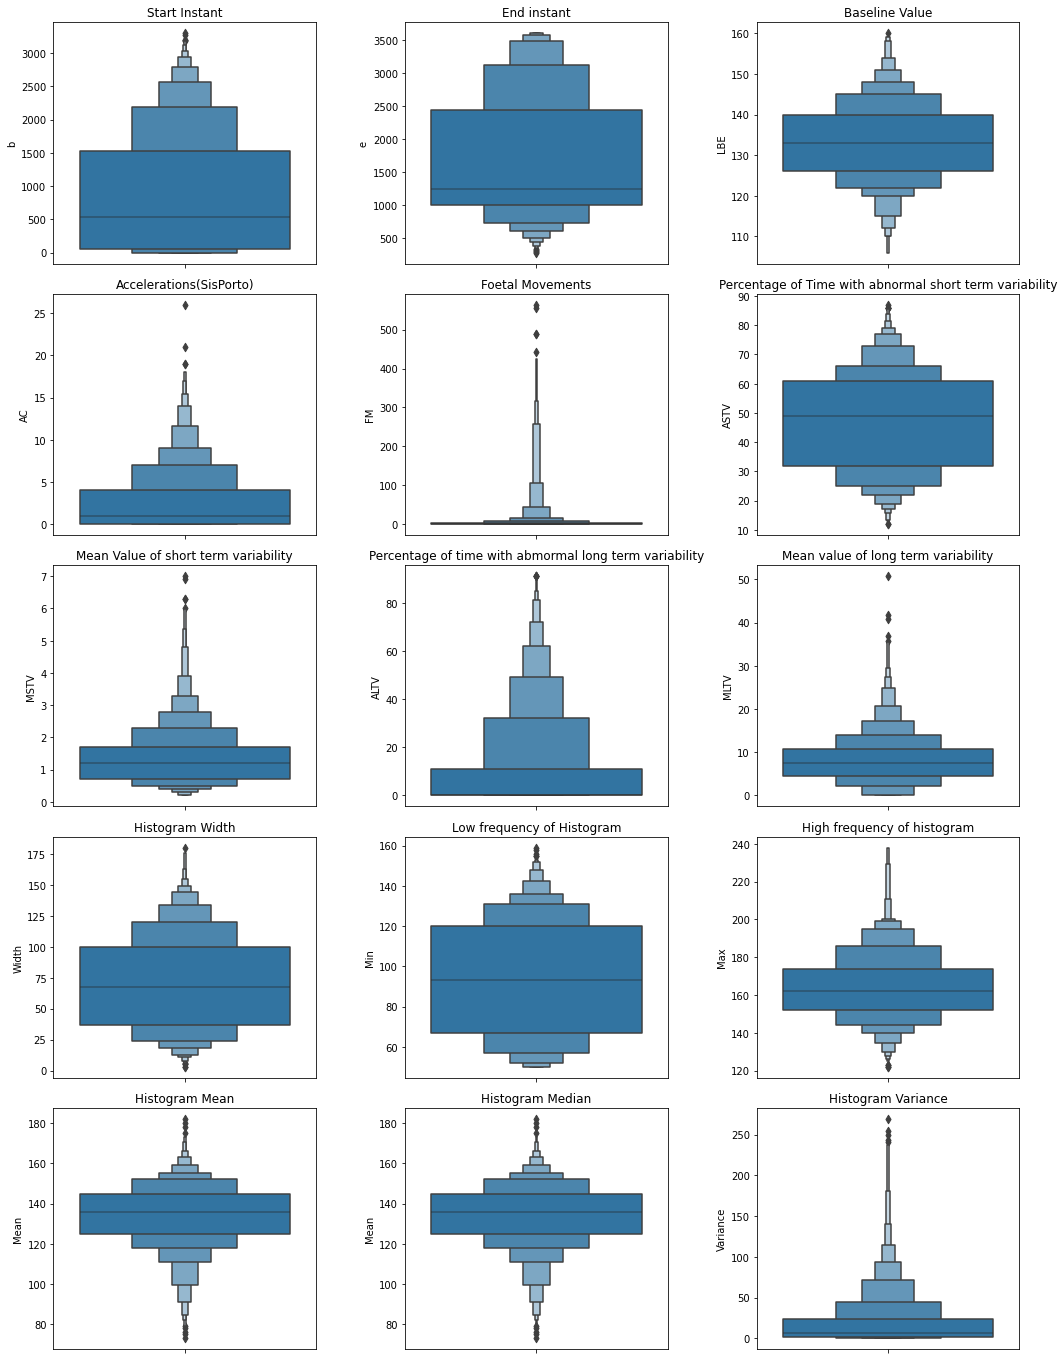

In [24]:
fig, axes = plt.subplots(5,3, figsize=(15,19))

axes[0,0].set_title('Start Instant')
sns.boxenplot(y='b', data=df, ax=axes[0,0])

axes[0,1].set_title('End instant')
sns.boxenplot(y='e', data=df, ax=axes[0,1])

axes[0,2].set_title('Baseline Value')
sns.boxenplot(y='LBE', data=df, ax=axes[0,2])

axes[1,0].set_title('Accelerations(SisPorto)')
sns.boxenplot(y='AC', data=df, ax=axes[1,0])

axes[1,1].set_title('Foetal Movements')
sns.boxenplot(y='FM', data=df, ax=axes[1,1])

axes[1,2].set_title('Percentage of Time with abnormal short term variability')
sns.boxenplot(y='ASTV', data=df, ax=axes[1,2])

axes[2,0].set_title('Mean Value of short term variability')
sns.boxenplot(y='MSTV', data=df, ax=axes[2,0])

axes[2,1].set_title('Percentage of time with abmormal long term variability')
sns.boxenplot(y='ALTV', data=df, ax=axes[2,1])

axes[2,2].set_title('Mean value of long term variability')
sns.boxenplot(y='MLTV', data=df, ax=axes[2,2])

axes[3,0].set_title('Histogram Width')
sns.boxenplot(y='Width', data=df, ax=axes[3,0])

axes[3,1].set_title('Low frequency of Histogram')
sns.boxenplot(y='Min', data=df, ax=axes[3,1])

axes[3,2].set_title('High frequency of histogram')
sns.boxenplot(y='Max', data=df, ax=axes[3,2])

axes[4,0].set_title('Histogram Mean')
sns.boxenplot(y='Mean', data=df, ax=axes[4,0])

axes[4,1].set_title('Histogram Median')
sns.boxenplot(y='Mean', data=df, ax=axes[4,1])

axes[4,2].set_title('Histogram Variance')
sns.boxenplot(y='Variance', data=df, ax=axes[4,2])

plt.tight_layout()

**Observations from the aboe Univariate 
analysis of the numerical variables**

* Majority of our datapoints has Start Instant between 1-1500
* Majority of our datapoints has End Instant between 1000-2500
* Majority of our data points has Baseline Value between 125-140
* The number of datapoints dropped with an increased Acceleration(SisPorto)
* Most of the data points had a Percentage of time with short term abnormal variability value between 30-60%
* Histogram width was between 25 and 100 
* Histogram variance range between 0-50 and had outliers between 200 amd 250
* Foetal Movements for most data points range between 0 and 100, with outliers 500 

##Bivariate & Multivariate Analysis
Having a strong understanding of our data, we will futher observe relationships between features.
Particularly realtionship of most features with our target variable NSP

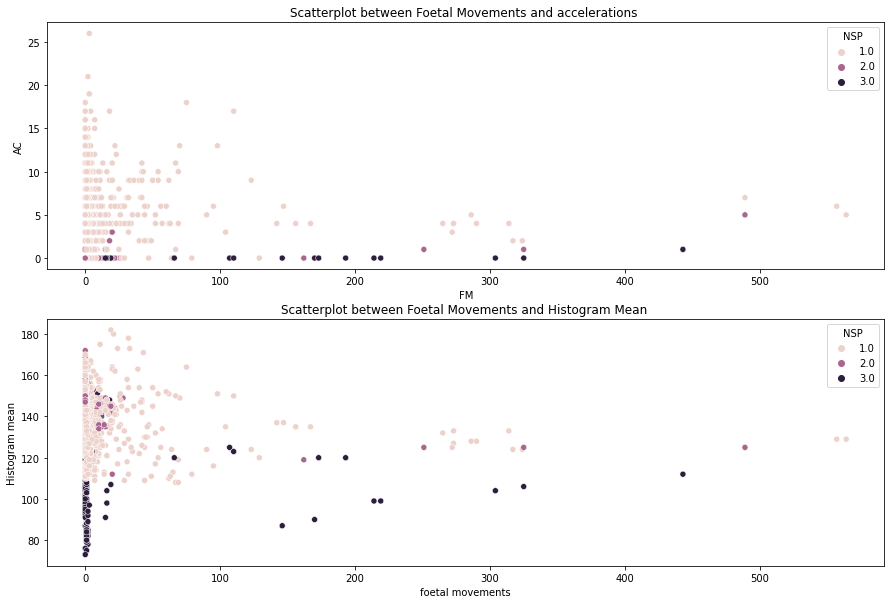

In [25]:
#Let's compare foetal movements and acceleration
fig, axes = plt.subplots(2, figsize=(15,10))

axes[0].set_title('Scatterplot between Foetal Movements and accelerations ')
plt.xlabel('foetal movements')
plt.ylabel('accelerations')
sns.scatterplot(x='FM', y='AC', data=df, hue='NSP', ax=axes[0])

axes[1].set_title('Scatterplot between Foetal Movements and Histogram Mean ')
sns.scatterplot(x='FM', y='Mean', data=df, hue='NSP', ax=axes[1])
plt.xlabel('foetal movements')
plt.ylabel('Histogram mean')

plt.show()

* While there is no clear strong correlerations there exist clusters of foetal states
* Observe that most of fetals in Normal state had high accelerations
* Also, observe that low accelerations and high foetal movements doesn't neceesary imply not Normal foetus.
* pathologic Fetal states tends to have high  foetal movemnts with low or no accelerations
* Observe that most pathologic feotus have lower histogram means and lower foetal movements

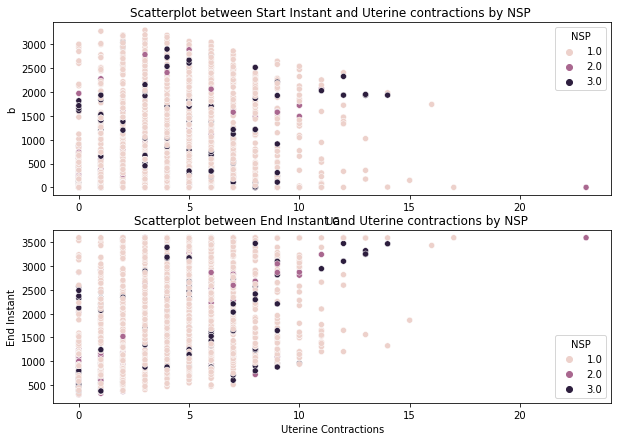

In [26]:
#Let's observe relationship between Uterine contraction and start and end instant

fig, axes = plt.subplots(2, figsize = (10,7))

axes[0].set_title('Scatterplot between Start Instant and Uterine contractions by NSP ')
sns.scatterplot(x='UC', y='b', data=df, hue='NSP', ax=axes[0])
plt.xlabel('Uterine Contractions')
plt.ylabel('Start Instant')

axes[1].set_title('Scatterplot between End Instant and Uterine contractions by NSP ')
sns.scatterplot(x='UC', y='e', data=df, hue='NSP', ax=axes[1])
plt.xlabel('Uterine Contractions')
plt.ylabel('End Instant')

plt.show()

* Observe that no clear correlations exist between Uterine contractions and start time
* In addition, no correlations exist between Uterine contractions and end time

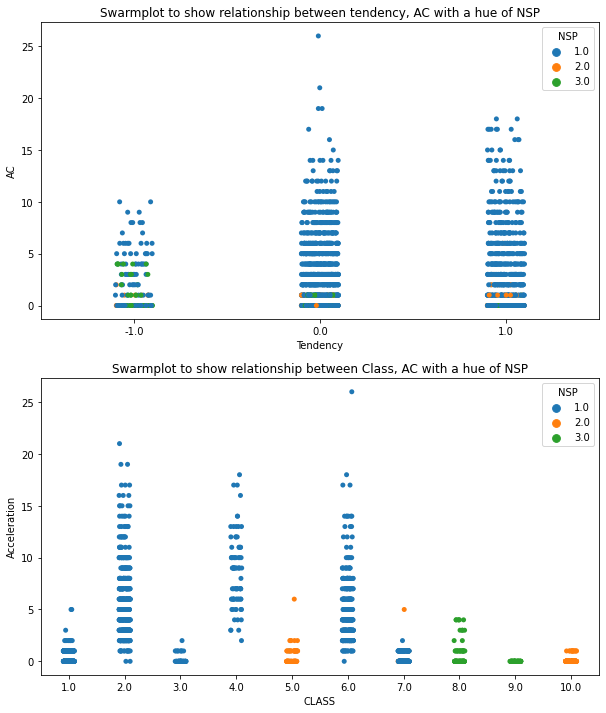

In [27]:
#Lets checkout a swarmplot to see relationship between Tendency, CLASS and acceleartion with ahue on foetal state

fig, axes = plt.subplots(2, figsize=(10,12))

axes[0].set_title('Swarmplot to show relationship between tendency, AC with a hue of NSP')
sns.stripplot(x='Tendency', y='AC', data=df, hue='NSP', ax=axes[0])
plt.xlabel('Tendency')
plt.ylabel('Acceleration')

axes[1].set_title('Swarmplot to show relationship between Class, AC with a hue of NSP')
sns.stripplot(x='CLASS', y='AC', data=df, hue='NSP', ax=axes[1])
plt.xlabel('CLASS')
plt.ylabel('Acceleration')

plt.show()

* Observe accelerations was low for all but present in all differmet temdemcies for all foetal states
* Normal foetal states seemed to be least in Tendency=-1 
* Observe Classes 1,2,3,4,6 and 7 has Normal foetal states
* Classes 5 and 10 has Suspects foetal states
* Classes 8 and 9 has pathologic foetal states

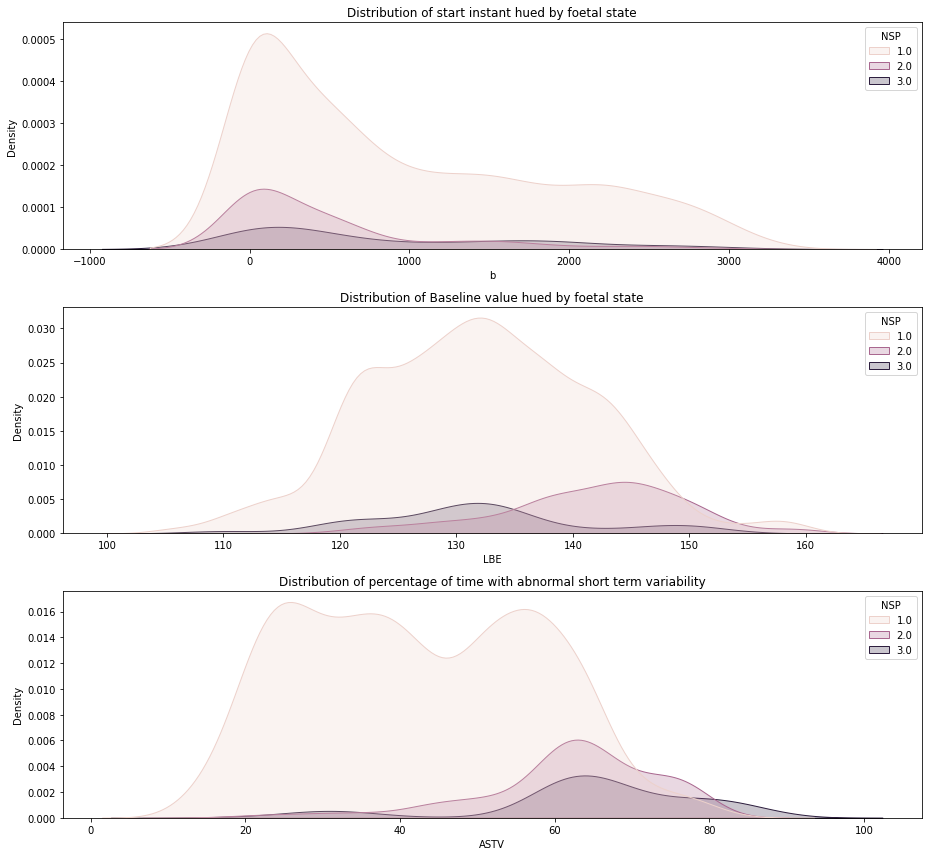

In [28]:
#Let's observe disributions of some feature with a hue on foetal state

fig, axes = plt.subplots(3, figsize=(13,12))

axes[0].set_title('Distribution of start instant hued by foetal state')
sns.kdeplot(x='b', data=df,  hue='NSP', ax=axes[0], shade=True)

axes[1].set_title('Distribution of Baseline value hued by foetal state')
sns.kdeplot(x='LBE', data=df, hue='NSP', ax=axes[1], shade=True)

axes[2].set_title('Distribution of percentage of time with abnormal short term variability')
sns.kdeplot(x='ASTV', data=df, hue='NSP', ax=axes[2], shade= True)

plt.tight_layout()
plt.show()

* Observe the distributions for all foetal states are skewed to the right
* The mean for Baseline value differs for each foetal states
* Normal State NSP averagely has a lower percentage of time with abnormal short term variability to pathologic and suspect states

In [29]:
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'Width', 'Min', 'Max',
       'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A',
       'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

Now that we have a sense of our data, we can begin the preprocesing and modelling stages